In [1]:
import ssl
from sklearn.datasets import fetch_openml
import numpy as np

# Bypass SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Load the MNIST 784 dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")


Feature shape: (70000, 784)
Target shape: (70000,)


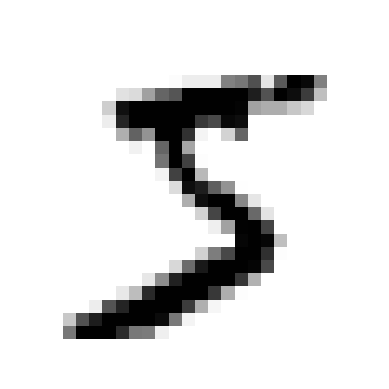

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

test_image = X.iloc[0].values.reshape(28,28)
test_image

plt.imshow(test_image, cmap='binary')
plt.axis('off')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)
some_digit = X.iloc[0].values

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone (sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


0.9669
0.91625
0.96785


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
y_train_pred = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)
# precision_score(y_train_5, y_train_pred)
# recall_score(y_train_5, y_train_pred)
# f1_score(y_train_5, y_train_pred)


array([[54579,     0],
       [ 5421,     0]])

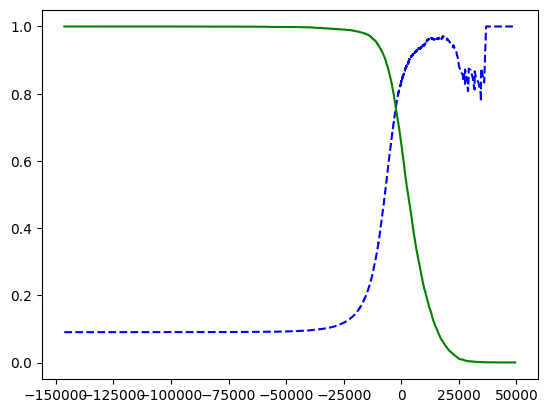

In [122]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_percesion_recall_vs_threshold(precesions, recalls, thresholds):
    plt.plot(thresholds, precesions[:-1], "b--", label='Precesion')
    plt.plot(thresholds, recalls[:-1], 'g', label='Recall')
    

plot_percesion_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

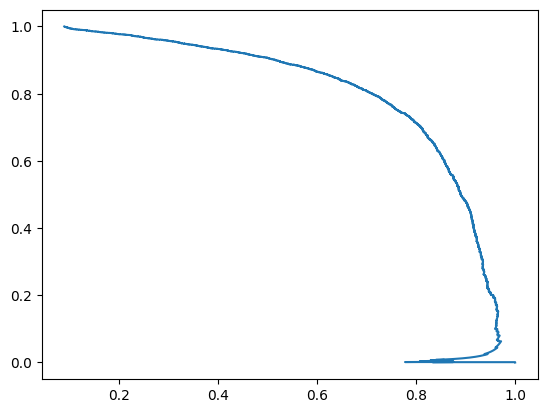

In [123]:
plt.plot(precisions,recalls)
plt.show()